In [1]:
#Rishikesh Suryavanshi
#PICT
#21-5-2023
#Importing Libraries


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df1 = pd.read_csv("1_ev_charger_dataset.csv")
df1.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [3]:
df2 = pd.read_excel('2_ev_charging_station_dataset.xlsx', sheet_name='Table 4', header=1)
df2.head()

,State/UT,EV Charging Facility
0,Andhra Pradesh,65
1,Arunachal Pradesh,4
2,Assam,19
3,Bihar,26
4,Chandigarh,4


In [4]:
df3 = pd.read_excel('3_ev_market_india_dataset.xlsx')
df3.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [5]:
print(df1.shape,df2.shape,df3.shape)

(24, 6) (31, 2) (103, 14)


In [6]:
df1.describe()

,2W,3W,4W,Bus,Chargers
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8421.458333,3853.166667,334.041667,28.500000,106.791667
std,10942.261145,8850.690961,476.930628,63.771331,96.623869
min,187.000000,234.000000,12.000000,0.000000,10.000000
25%,848.000000,512.750000,34.750000,0.000000,25.000000
50%,2967.500000,931.000000,129.000000,0.000000,67.500000
75%,10697.750000,2659.250000,434.000000,5.500000,180.250000
max,38558.000000,42881.000000,1895.000000,197.000000,317.000000


In [7]:
df2.describe()

,EV Charging Facility
count,31.000000
mean,49.548387
std,50.768651
min,1.000000
25%,4.000000
50%,26.000000
75%,81.500000
max,174.000000


In [9]:
df3.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.2+ KB


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State/UT              31 non-null     object
 1   EV Charging Facility  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


In [13]:
df1.isnull().sum()

Region      0
2W          0
3W          0
4W          0
Bus         0
Chargers    0
dtype: int64

In [17]:
for i in df1.columns:
    print(df1[i].value_counts())

Meghalaya           1
Puducherry          1
Madhya Pradesh      1
Chandigadh          1
Uttar Pradesh       1
Maharastra          1
Telangana           1
Sikkim              1
Bihar               1
Haryana             1
Gujarat             1
Assam               1
Himachal Pradesh    1
Odisha              1
Karnataka           1
Chhattisgarh        1
Delhi               1
Rajasthan           1
Kerala              1
Tamil Nadu          1
Uttarakhand         1
Jammu & Kashmir     1
Andhra Pradesh      1
West Bengal         1
Name: Region, dtype: int64
187      1
4578     1
38558    1
1789     1
9852     1
3547     1
954      1
856      1
22359    1
5782     1
11756    1
2388     1
2387     1
14578    1
824      1
525      1
32844    1
25642    1
10345    1
641      1
357      1
9540     1
259      1
1567     1
Name: 2W, dtype: int64
42881    1
898      1
254      1
893      1
2876     1
11547    1
542      1
568      1
253      1
308      1
566      1
1865     1
3654     1
964      1
234 

In [19]:
for j in df2.columns:
    print(df2[j].value_counts())

Kerala               1
Chhattisgarh         1
J&K                  1
Telangana            1
Tripura              1
Bihar                1
Gujarat              1
Karnataka            1
Uttarakhand          1
Uttar Pradesh        1
Pondicherry          1
Arunachal Pradesh    1
Meghalaya            1
West Bengal          1
Manipur              1
Delhi                1
Leh                  1
Punjab               1
Maharastra           1
Chandigarh           1
Andhra Pradesh       1
Assam                1
Jharkhand            1
Odisha               1
Nagaland             1
Goa                  1
Himachal Pradesh     1
Rajasthan            1
Haryana              1
Tamil Nadu           1
Madhya Pradesh       1
Name: State/UT, dtype: int64
3      3
2      3
4      2
26     2
51     1
114    1
167    1
100    1
71     1
88     1
87     1
22     1
1      1
19     1
112    1
17     1
65     1
174    1
13     1
76     1
10     1
41     1
39     1
66     1
128    1
Name: EV Charging Facility, dtype

In [21]:
for k in df3.columns:
    print(df3[k].value_counts())

Tesla         13
Audi           9
Nissan         8
Volkswagen     8
Skoda          6
Kia            5
Porsche        5
Renault        5
BMW            4
Ford           4
Byton          3
Opel           3
Mercedes       3
Smart          3
Hyundai        3
Peugeot        2
Fiat           2
Honda          2
Polestar       1
DS             1
Sono           1
Lucid          1
Volvo          1
Jaguar         1
SEAT           1
Mazda          1
Aiways         1
Lightyear      1
Lexus          1
CUPRA          1
Citroen        1
Mini           1
MG             1
Name: Brand, dtype: int64
e-Soul 64 kWh           2
2                       1
e-Niro 64 kWh           1
XC40 P8 AWD Recharge    1
Taycan Cross Turismo    1
                       ..
Q4 e-tron               1
Kangoo Maxi ZE 33       1
i3s 120 Ah              1
Corsa-e                 1
MX-30                   1
Name: Model, Length: 102, dtype: int64
9.0     7
7.3     6
7.5     5
7.9     5
10.0    4
4.0     3
5.1     3
5.7     3
7.0     

<Axes: >

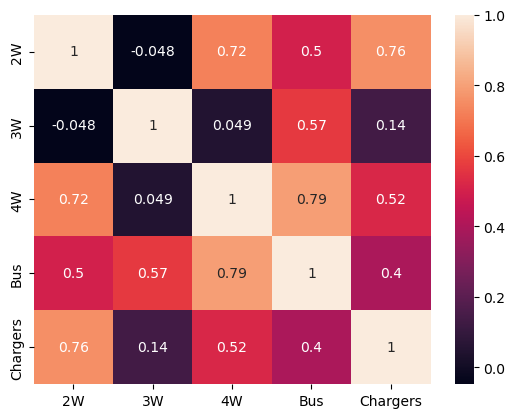

In [109]:
sns.heatmap(df1.corr(),annot=True)

<Axes: >

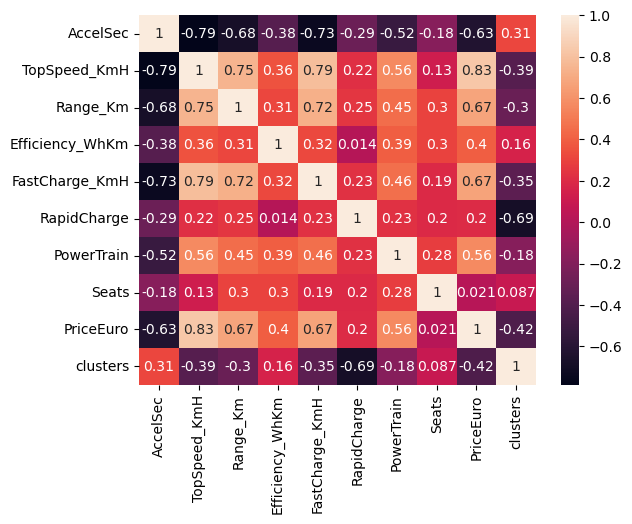

In [111]:
sns.heatmap(df3.corr(),annot=True)

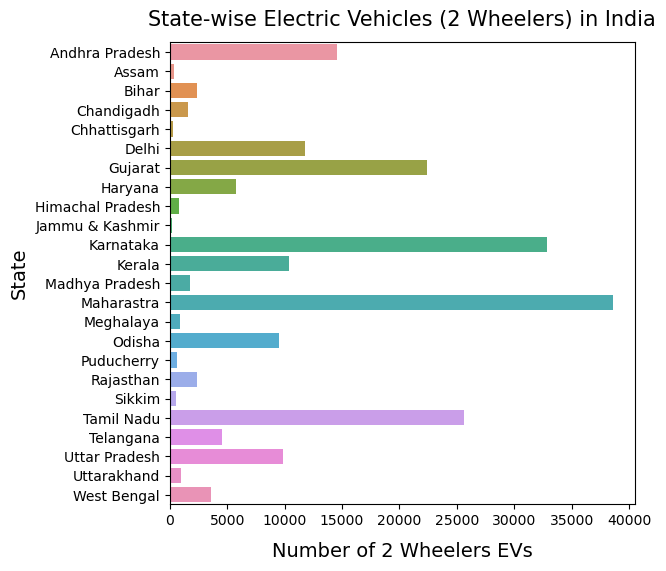

In [27]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='2W')
plt.ylabel('State', fontsize=14)
plt.xlabel('Number of 2 Wheeler EVs', fontsize=14, labelpad=10)
plt.title(label='State-wise Electric Vehicles (2 Wheelers) in India', weight=200, size=15, pad=12)
plt.show()

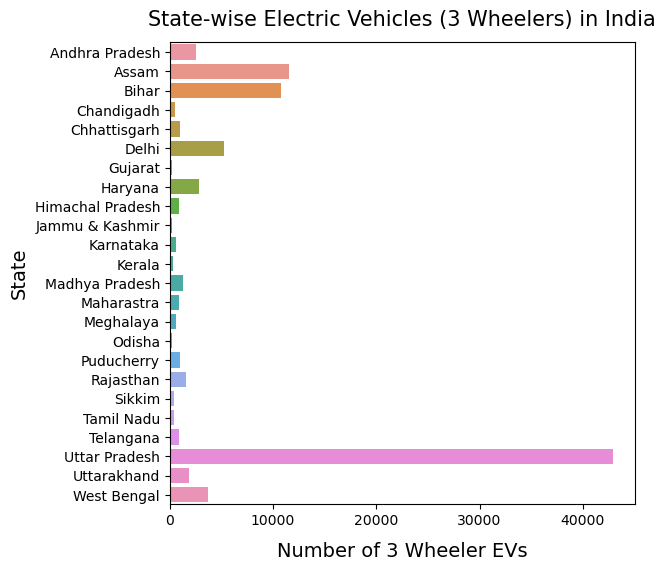

In [31]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='3W')
plt.ylabel('State', fontsize=14)
plt.xlabel('Number of 3 Wheeler EVs', fontsize=14, labelpad=10)
plt.title(label='State-wise Electric Vehicles (3 Wheelers) in India', weight=200, size=15, pad=12)
plt.show()

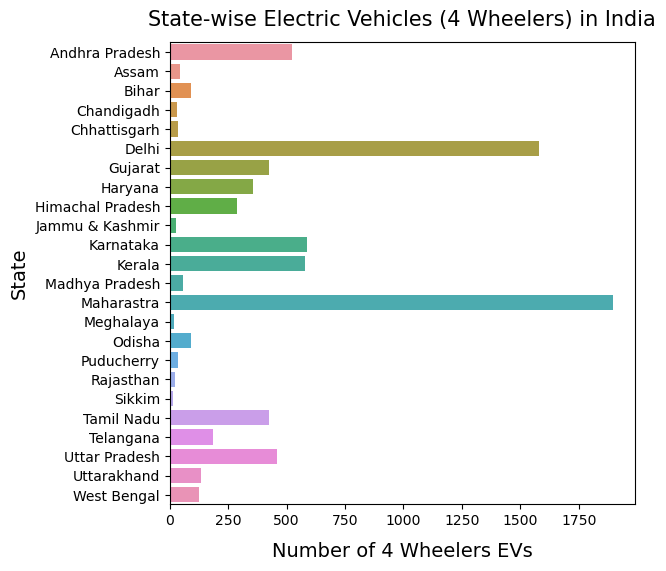

In [30]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='4W')
plt.ylabel('State', fontsize=14)
plt.xlabel('Number of 4 Wheelers EVs', fontsize=14, labelpad=10)
plt.title(label='State-wise Electric Vehicles (4 Wheelers) in India', weight=200, size=15, pad=12)
plt.show()

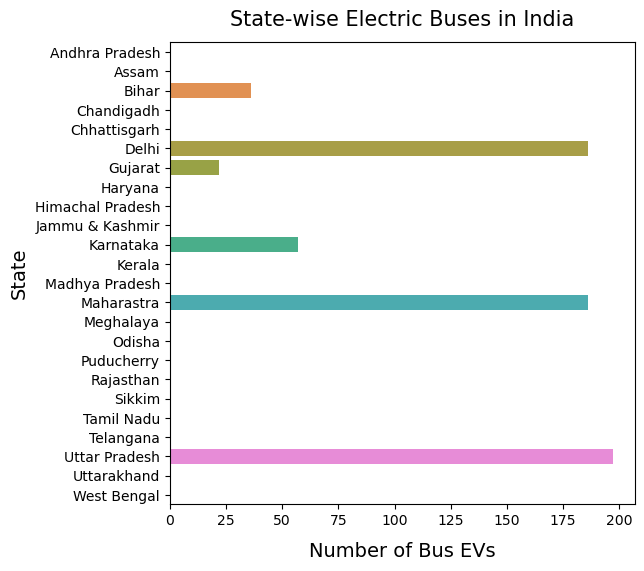

In [35]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='Bus')
plt.ylabel('State', fontsize=14)
plt.xlabel('Number of Bus EVs', fontsize=14, labelpad=10)
plt.title(label='State-wise Electric Buses in India', weight=200, size=15, pad=12)
plt.show()

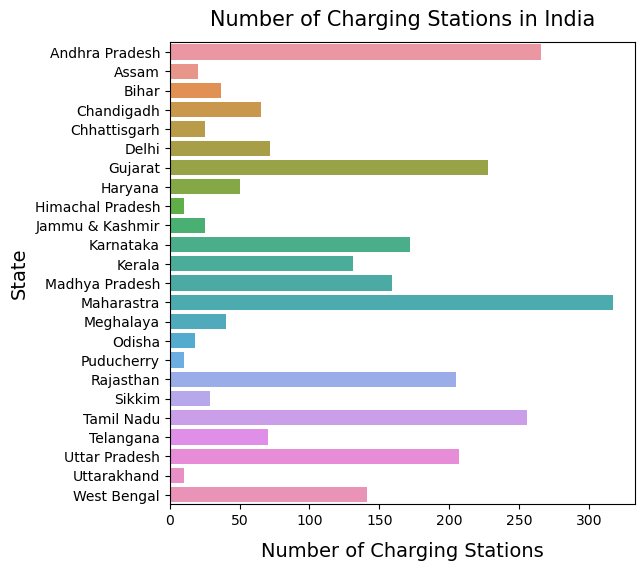

In [33]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='Chargers')
plt.ylabel('State', fontsize=14)
plt.xlabel('Number of Charging Stations', fontsize=14, labelpad=10)
plt.title(label='Number of Charging Stations in India', weight=200, size=15, pad=12)
plt.show()

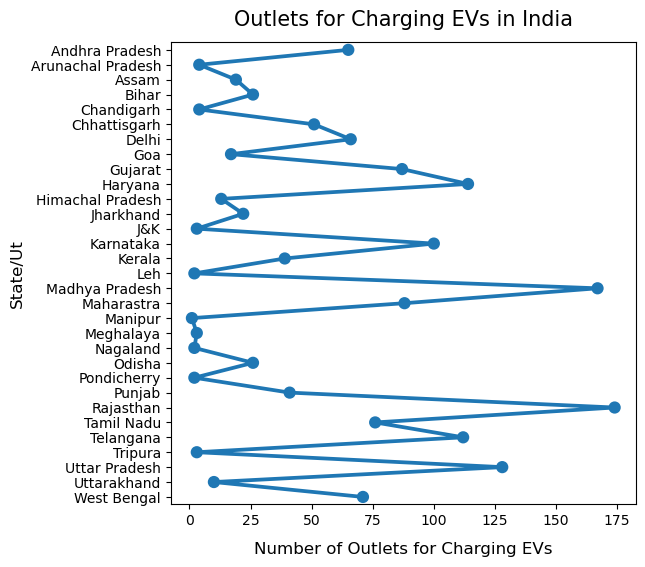

In [38]:
plt.figure(figsize=(6, 6))
sns.pointplot(data=df2, y='State/UT', x='EV Charging Facility')
plt.xlabel('Number of Outlets for Charging EVs', size=12, labelpad=10)
plt.ylabel('State/Ut', size=12)
plt.title(label='Outlets for Charging EVs in India', weight=200, size=15, pad=12)
plt.show()

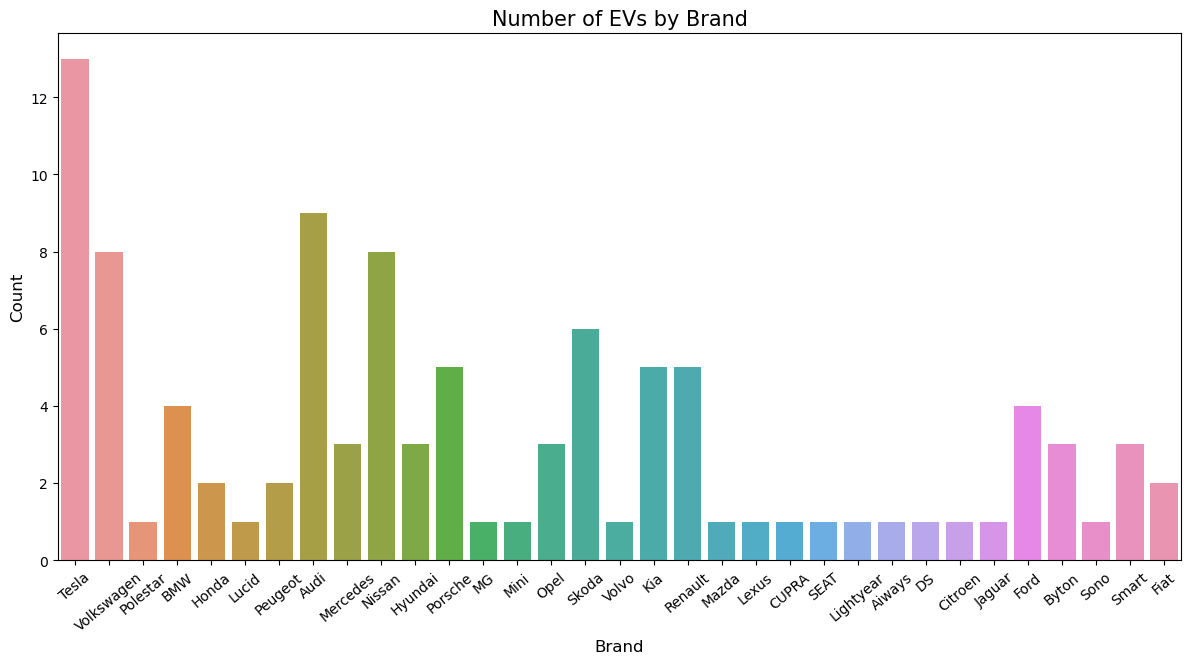

In [47]:
sns.catplot(data=df3, x='Brand', kind='count', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand', size=12)
plt.ylabel('Count',size=12)
plt.title('Number of EVs by Brand', size=15)
plt.show()

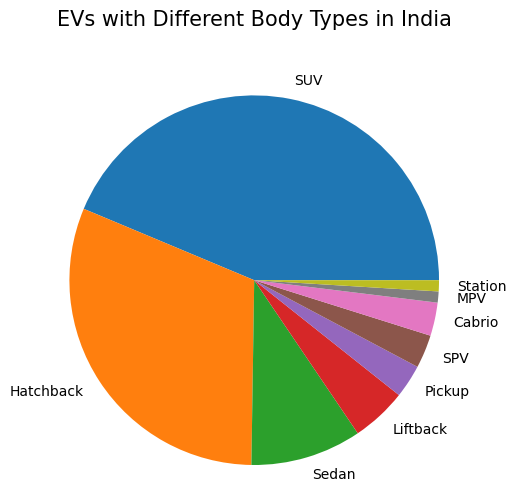

In [66]:
plt.figure(figsize=(3,3))
x = df3['BodyStyle'].value_counts().plot.pie(radius=2, startangle=0 )
plt.title(label='EVs with Different Body Types in India',size=15, pad=100)
plt.ylabel('')
plt.show()

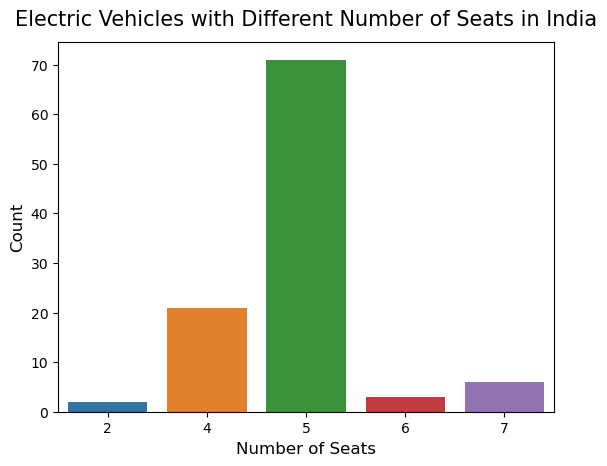

In [67]:
sns.countplot(data=df3, x='Seats')
plt.xlabel('Number of Seats',size=12)
plt.ylabel('Count', size=12)
plt.title(label='Electric Vehicles with Different Number of Seats in India',size=15, pad=12)
plt.show()

In [68]:
df3.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [69]:
#Lets build the Model

In [70]:
# PowerTrain column
df3['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)

# RapidCharge column
df3['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

# selecting columns for building a model
x = df3[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]
x.columns

Index(['AccelSec', 'TopSpeed_KmH', 'Efficiency_WhKm', 'FastCharge_KmH',
       'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro', 'PowerTrain'],
      dtype='object')

In [76]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [73]:
pca = PCA(n_components=9)
x_pca = pca.fit_transform(x_scaled)
df_pca = pd.DataFrame(x_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775
3,0.291018,-0.000150,-0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,0.261663
4,-2.602679,-0.626489,-0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,-0.049904


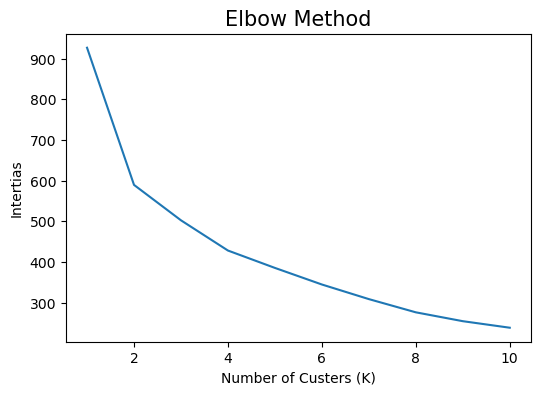

In [84]:
#Using Elbow Method


intertias = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(x_pca)
  intertias.append(kmean.inertia_)

plt.figure(figsize=(6,4))
plt.title('Elbow Method', size=15 )
plt.plot(range(1, 11), intertias)
plt.xlabel('Number of Custers (K)')
plt.ylabel('Intertias')
plt.show()

In [93]:
#Now Usin Kmeans to Cluster


kmeans = KMeans(n_clusters=4, random_state=90)
kmeans.fit(x_pca)
print(kmeans.labels_)

[0 3 2 1 1 0 3 3 1 2 2 1 1 2 3 1 0 1 3 1 1 2 1 0 0 1 1 2 3 3 2 1 1 2 1 1 1
 3 3 2 0 1 2 1 1 1 1 0 0 3 2 0 1 1 2 1 1 3 1 0 3 2 2 2 3 0 1 2 3 2 1 2 0 2
 1 1 2 3 2 0 1 2 3 1 2 1 2 2 2 1 2 3 3 2 1 1 1 3 1 2 2 2 2]


In [94]:
pd.Series(kmeans.labels_).value_counts()

1    39
2    32
3    19
0    13
dtype: int64

In [108]:
# kmeans = KMeans(n_clusters=3, random_state=90)
# kmeans.fit(x_pca)
# print(kmeans.labels_)
# pd.Series(kmeans.labels_).value_counts()

kmeans.cluster_centers_

array([[ 3.38080722, -1.38222959, -0.36489344,  0.10476922,  0.40601443,
         0.27185359,  0.24199669, -0.10661851,  0.04313075],
       [-1.28035008,  0.15751337, -0.80380172,  0.03882667, -0.26171256,
         0.0576548 , -0.02518157, -0.04843479, -0.00967151],
       [ 1.47340441,  0.75533302,  0.44439293,  0.22304959,  0.00587772,
        -0.20900642, -0.04639724,  0.13707866,  0.00747268],
       [-2.1666201 , -0.64972069,  1.15112147, -0.52704354,  0.24950081,
         0.04766166, -0.03574547, -0.05850103, -0.02224405]])

In [95]:
df3['clusters'] = kmeans.labels_

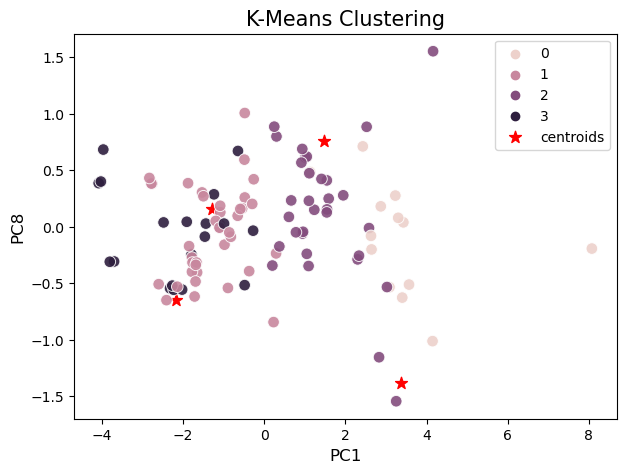

In [104]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC8', s=70, hue=kmeans.labels_, zorder=2, alpha=.9)
plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', size=12)
plt.ylabel('PC8', size=12)
plt.legend()
plt.title('K-Means Clustering', size=15)
plt.show()